# Author: Kritika Srivastava

## Task 2: Prediction Using Unsupervised Machine Learning

The task is to predict the optimum number of cluster and represent it visually.

### Question: From the given 'Iris' dataset predict the optimum number of clusters and represent it visually

The first thing we need to do is load the required libraries, then the dataset and further we will explore the dataset.

#### Step 1: Importing required libraries

In [1]:
#step1: The first step will be to load the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.metrics import silhouette_score
import warnings as wg
wg.filterwarnings('ignore') 
print("Libraries Successfully Imported!!")

Libraries Successfully Imported!!


#### Step 2: Reading the dataset

In [2]:
#Step2: The second step is to read the dataset from the source.
dataset_location="Iris.csv"
dataset=pd.read_csv(dataset_location)
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Step 3: Exploring the dataset

We will explore the dataset in two further steps. First will be knowing the structure of the dataset and the second will be knowing the statistical properties of the data set.

In [3]:
#Step3: The third step is to explore the data in the above mentioned two ways
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Here, we see that our dataset comprises of six columns i.e. it has six variables Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm and Species.SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm variable are of float type while the Id is of integer type and species is an object. Also, the dataset has 150 entries and thus we have 150 observation in each of the above 6 columns. Now note that all 150 observations are non-null which means that there is no missing observation in our data. Now the mean SepalLenghtCm is 5.84 with a standard deviation of 0.83, the mean SepalWidthCm is 3.05 with a standard deviation of 0.43, the mean PetalLenghtCm is 3.76 with a standard deviation of 1.76 and the mean PetalWidthCm is 1.19 with a standard deviation of 0.76.Further, the minimum, maximum and quartiles can be seen from the table above for each of the column.

Now to get some idea about the species variable let us look at the frequency distribution of the species:

In [4]:
#to find the frequency distribution of variable species:
dataset['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

So, here we can see that the flower Iris has three species: setosa, versicolor and virginica. Each with a count of 50.

#### Step 4: Data Preparation

We will first create the dataframe using the pandas library. As we do not need the variable Id for our analysis so we will drop this column from our dataframe. Further, we will look for outliers and if any exist we will remove it.

In [5]:
#step5(a): The fifth step will be creating the dataframe
dataframe=pd.DataFrame(dataset)
Iris=dataframe.drop(columns=["Id"])
Iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Now we will look for outliers. And to do so we will plot the Boxplot

Text(0.5, 1.0, 'Boxplot')

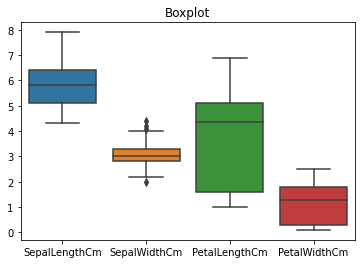

In [6]:
#step5(b): Now we will look for the outliers if their exist any
sns.boxplot(data=Iris)
plt.title("Boxplot")

From, the boxplot we can see that only the SepalWidthCm has some outliers while the other three variables do not have outliers. Thus, now we will remove these outliers by using the Inter Quartile Range (IQR) method. According to which any observation outside the range of (Q1-1.5(IQR)) and (Q3+1.5(IQR)) will be considered an outlier and should be removed. And IQR is defined as:


IQR=Q3-Q1


where Q3  is the third quartile and Q1 is the first quartile.

In [7]:
#step5(c): removing the outliers 
Q1=Iris.quantile(0.25)
Q3=Iris.quantile(0.75)
IQR=Q3-Q1
Iris=Iris[-((Iris<(Q1-1.5*IQR))|(Iris>(Q3+1.5*IQR))).any(axis=1)]
print("Outliers Removed Successfully!!")

Outliers Removed Successfully!!


Text(0.5, 1.0, 'Boxplot After removing Outliers')

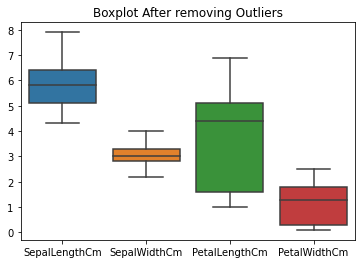

In [8]:
#Step5(d): Cross checking if the outliers are removed
sns.boxplot(data=Iris)
plt.title("Boxplot After removing Outliers")

Thus, we can see that our dataset is free from outliers now. And so we can proceed further.

#### Step 6: Solution Step: Applying the K-Means Clustering Algorithm and visualising it

Now we will perform the centroid based clustering algorithm called K-means clustering. Such algorithms are effecient but sensitive to initial conditions and outliers. 
Here we will apply the Elbow method to decide on the optimum number of cluster(k) to perform the K-means clustering.

##### The Elbow Method:

This method is commonly used to determine the optimum number of clusters in a dataset. In this method we plot the explained variation as a function of the number of clusters, and finally we pick the number of cluster at which we see an elbow in the curve plotted and this is the number of cluster to be used. 

To apply the method we will first make data arrangement so that we can use the data in the algorithm easily. And then we will import the KMeans method from the sklear.cluster. Then we will take different cluster values and observe the within cluster sum of squares(WCSS) . Further, in the for loop we will fit the model on the prepared data and will store different value of WCSS for different k in a list.

Next, we will plot the elbow plot with the value of k on the x axis and WCSS on the y axis and will look for the elbow. 
Here for the simplicity I have indicated the elbow using the plt.annote() method using an arrow prop

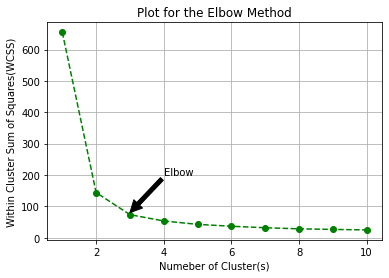

In [9]:
#Step6(a): Applying the Elbow Method
x=Iris.iloc[:,[0,1,2,3]].values
from sklearn.cluster import KMeans
WCSS=[]
k=range(1,11)
for i in k:
    kmeans=KMeans(n_clusters=i,init='k-means++',
                 max_iter=300,n_init=10,random_state=0)
    kmeans=kmeans.fit(x)
    WCSS.append(kmeans.inertia_)
WCSS
plt.plot(k,WCSS,"go--")
plt.title("Plot for the Elbow Method")
plt.xlabel("Numeber of Cluster(s)")
plt.ylabel("Within Cluster Sum of Squares(WCSS)")
plt.annotate("Elbow",xytext=(4,200),xy=(3,80),arrowprops={"facecolor":"black"})
plt.grid()

From the above plot we can see that elbow occurs by 3 poinra. Thus the elbow method shows the value of k to be 3.

###### From the elbow method we get the optimum number of clusters to be 3

#### Visualising the clusters

Now we will visualise the clusters using the k means classifier for 3 clusters. And then we will plot the clusters for the Sepal (first two columns of the data set) and Petal (last two columns of the data set) independently. 

In [10]:
#step6(b): Visualising the clusters
kmeans=KMeans(n_clusters=3,init='k-means++',
             max_iter=300,n_init=10,random_state=0)
ykmeans=kmeans.fit_predict(x)
ykmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

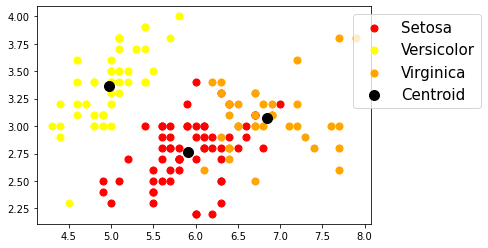

In [11]:
#visualising the first two columns of the data with the centroid of clusters
plt.scatter(x[ykmeans==0,0],x[ykmeans==0,1],s=50, c='red',label="Setosa")
plt.scatter(x[ykmeans==1,0],x[ykmeans==1,1],s=50, c='yellow',label="Versicolor")
plt.scatter(x[ykmeans==2,0],x[ykmeans==2,1],s=50, c='orange',label="Virginica")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100, c='black',label="Centroid")
plt.legend(loc=1,bbox_to_anchor=(1.35,1),prop={"size":15})

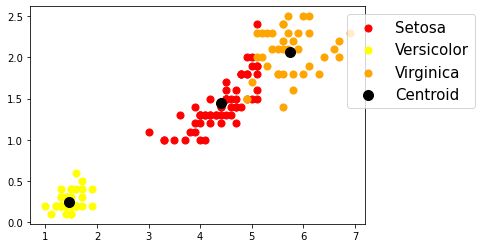

In [12]:
#visualising the last two columns of the data with the centroid of clusters
plt.scatter(x[ykmeans==0,2],x[ykmeans==0,3],s=50, c='red',label="Setosa")
plt.scatter(x[ykmeans==1,2],x[ykmeans==1,3],s=50, c='yellow',label="Versicolor")
plt.scatter(x[ykmeans==2,2],x[ykmeans==2,3],s=50, c='orange',label="Virginica")
plt.scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3],s=100, c='black',label="Centroid")
plt.legend(loc=1,bbox_to_anchor=(1.35,1),prop={"size":15})

Thus, these are the two visual representation of our clusters with the centroids.

## Conclusion:

### So we have predicted the optimum number of clusters to be 3 and above is the visual representation of the clusters.

# Thank You!!